# Optimize with SciPy

👋 Say hello to [SciPy](https://www.scipy.org/) (`Scientific Python`), a powerful library:
- based on NumPy
- used for Mathematics in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## (1) Local Optimization

* In our previous exercise, we saw that it is important to **minimize the (mean) squared errors between the targets and the predictions** by  finding the minimum of a given function.

* We have two approaches for this problem:
    1. `closed-formed solutions` (such as _matrix inversion_)
    2. `iterative approaches` (such as _gradient descent_)

👉 Let's discover how to use the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) module to find the **local** minimium of a function _(in a few lines of code)_

In [2]:
# Import optimize
from scipy import optimize

### (1.1) 1D-function

Let's consider the function $ f : x \rightarrow x^2 - 20 \cdot  cos(x) $

In [3]:
def f(x):
    return (x**2 - 20 * np.cos(x))

❓ Plot this function with the *x-axis* below between -10 and +10 ❓

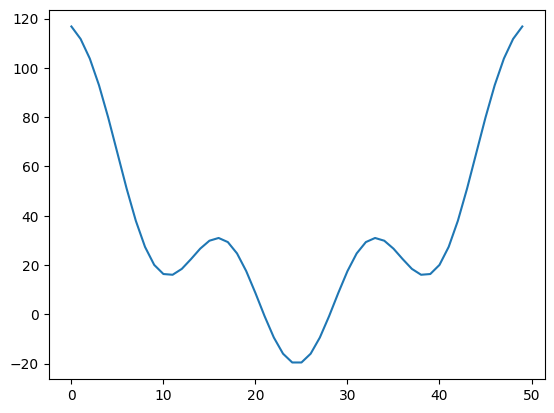

In [7]:
x_values = np.linspace(-10,10,50)
plt.plot(f(x_values))

❓ Try to find the **local minimum of $f$**, from a starting point `x0`, using `scipy.optimize.minimize()` ❓

❓ Starting from a given point $ x_0 $, `scipy.optimize.minimize()` was able to find:
* a **miminum of $f$** near a value displayed in the variable `x`
* and gives you the number of iterations `nit` it took for `scipy` to converge the minimum of the function $f$.

What can you conclude ❓

❓ Try to change the `x0` and observe what is happening ❓


<details>
    <summary><i>Explanations</i></summary>
    
💡 After <code>nit</code> iterations, the algorithm of the <code>scipy.minimize()</code> function gets stuck in a local minimum <code>x</code>, except if it started from a value of <code>x0</code> that was already close enough to the global minimum (which is 0 according to the graph above). The value of the local minimum found can be read in  <code>fun</code> - 15.79 in our case.
    
💡 In math, we say that this function is not [convex](https://en.wikipedia.org/wiki/Convex_function). If the function was `convex`, any local minimum would actually be the global minimum! In fact, Machine-Learning loves convexity, and such problems with convex functions are very easy to solve with iterative processes such as the gradient descent!
</details>


### (1.2)  2D-function

As we saw in the previous exercise, finding the minimum of a function with more than one parameter becomes rapidly complex. Let's try it out with a multivariate function: $$ g : (x,y) \rightarrow -(y + 47) \cdot   sin(\sqrt{\lvert\frac{x}{2} + (y  + 47) \rvert} ) \
        -x \cdot sin(\sqrt{\lvert x - (y  + 47)\rvert}) $$

In [ ]:
def g(X):
    return -(X[1] + 47) * np.sin(np.sqrt(abs(X[0]/2 + (X[1]  + 47)))) \
        -X[0] * np.sin(np.sqrt(abs(X[0] - (X[1]  + 47))))

❓ Run the cell below to visualize `g` in 3D ❓

In [ ]:
# Build a (50*50) meshgrid
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx, yy]) # (2, 100, 100)

# Compute Z, a 2D-array containing g(x,y) for each (x,y) in the meshgrid
Z = g(zz)

# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='terrain')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('g(x, y)'); ax.view_init(45, -45);
plt.show()

❓Initialize a starting point `X0` ❓

In [ ]:
# YOUR CODE HERE

❓Find a `minimum` using `scipy.optimize.minimize()` ❓

In [ ]:
# Compute and store the minimum inside a `minimum` variable


❓Does this look like the absolute minimum ❓ Check it out below ❓

In [ ]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum[0], minimum[1], c='r')

❗️ You probably only found a **local** minimum to your objective function f, given a starting point $X0$.

❓ Can you think about  a procedure that would increase your chance of finding the **global** minima ❓

> YOUR ANSWER HERE

<details>
    <summary><i>Hints</i></summary>

👉 One empirical idea could be to loop over many random starting points $X0$, and store the minimum value found at each run. After each iteration, you should increase your chance of finding the global minimum (if there is any) 👈

**🧪Check your code!**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize2d',
    X0_shape=X0.shape,
    minimum_shape=minimum.shape
)
result.write()
print(result.check())

### (1.3) Minimize under constraint(s) 🔥

👉 In real world problems, we often want to minimize a function $h(\textbf{x})$, **given a set of constraints on the values of $\textbf{x}$ itself**.   

🎒 See for instance, the famous [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem) 

👩🏻‍🏫 As often in Mathematics, **the hardest part is not to solve the equations but to convert your real-world problem into mathematical equations**. But for the sake of this challenge, let's assume we came with the following problem statement:

---
Find $\textbf{x}$ that minimizes $h(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3$  

Given the following constraints


$[1]\ \ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  (*equality constraint*)

$[2]\ \ x_1 x_2 x_3 x_4 \leqslant 25$ (*inequality constraint*)

$[3]\ \ 1 \leqslant x_1, x_2, x_3, x_4 \leqslant 5$ (*bounds*)

--- 

❓ Re-use the `minimize` method to find a local minimum using additional arguments as follows: 

`optimize.minimize(h, X0, constraints=cons, bounds=boundaries)` ❓

In [ ]:
# Define your objective function h(X) that you want to minimize
# X being a 1D-array of length 4

def h(X):
    pass  # YOUR CODE HERE

In [ ]:
# Define a function constraint1(X) that returns 0 if and only if equation [1] is True
# Otherwise it should return any other number

def constraint1(X):
    pass  # YOUR CODE HERE

# Define a function constraint2(X) that returns a positive number if and only if equation [2] is True
# Otherwise it should return a negative number 
def constraint2(X):
    pass  # YOUR CODE HERE

<details>
    <summary><i>Hint</i></summary>
    The above functions do not require an if else statement if we convert our constraints to Math equations.
</details>

👉 We are now defining for you the "constraint" argument needed to minimize function. Pay attention to the [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) syntax:

In [ ]:
con1 = {"type": "eq", "fun": constraint1}
con2 = {"type": "ineq", "fun": constraint2}
constraints = [con1, con2]

❓ Let's deal with equation [3].
We could write them in the form of 10 constraint functions, but it would take too much time.

👉 Instead, `scipy` allows us to create "boundaries" arguments for the variables we are looking for, in the following form:  
`bounds` = tuple of tuple `((x1_min, x_1_max), (x2_min, x_2_max), ....)`

In [ ]:
# Create bounds


In [ ]:
# Finally, define any starting point X0 for the minimization algorithm


❓ Now, try to find the minimum of your objective function `f` under such constraints using `optimize.minimize` ❓

In [ ]:
# Minimize under constraints


In [ ]:
# Store the minimum in a `local_minimum` variable


In [ ]:
# Check constraints


**🧪Check your code!**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize_constraints',
    bounds=bounds,
    X0=X0,
    Xmin=local_minimum
)
result.write()
print(result.check())

## (2) Global Optimization

As discussed, `scipy.optimize.minimize` finds **the local minima only in the vicinity of X0**. To find the **global** minima, you basically have two options:

<u> Option 1</u>: For **Math Nerds only** 🤓

Prove mathematically that your optimization problem is geometrically [convex](https://en.wikipedia.org/wiki/Convex_function). An optimization problem is convex in the following case: 
1. its objective function `h` is a convex function, 
2. the inequality constraints are convex, and 
3. the equality constraints are affine. 
    
📚 Read in this excellent math-based presentation from Berkeley if you want to dig further: [Convex Optimization for Machine Learning](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf)


<u>Option 2</u>: For **pragmatic people** 😁

- Loop over many different starting points $X0$ and look for the local minima nearby. 
- Store the minimum value found at each run. 
- After each iteration, you increase your chance of finding the global minimum.

----

💡 <u>Option 2</u> is exactly what the following Scipy libraries do under the hood: they _efficiently_ search for the parameter space, while using `minimize` at each iteration. It works better when the number of parameters to search for (degree of freedom) is small ([`scipy.optimize.shgo`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo) or [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html))

❗️ However, they only return a "global" minima **within specified boundaries** for the parameters



❓Try to use the two functions to find the global minima for our previous 2D-function $g(x,y)$, bounded between -150 and +150 ❓

In [ ]:
# Define a variable `bounds` with boundaries


In [ ]:
# Compute the global minimum `minimum_shgo` with the scipy.optimize.shgo method


In [ ]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_shgo[0], minimum_shgo[1], c='r')

In [ ]:
# Compute the global minimum `minimum_dual` with the scipy.optimize.dual_annealing method


In [ ]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_dual[0], minimum_dual[1], c='r')

**🧪Check your code!**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('global_optimization',
    bounds=bounds,
    Xmin_shgo=minimum_shgo,
    Xmin_dual=minimum_dual
)
result.write()
print(result.check())

## (3) Aproximations

### (3.1) Fitting a scatter plot

🧑🏻‍🏫A preliminary step to analyze the relationship between two quantitative variables X and Y is to **scatterplot** them. 

🤔Then, the question is: what relation do we have between X and Y ? Can we fit a scatterplot with a straight line ? If not, can we approximate the relationship between X and Y by a polynomial curve ? a logarithm curve ? ...

We often have to fit a scatterplot with a straight line, but it can also happen to look like something else (polynomial, logarithmic etc...)

❓ Consider the dataset below: would you try to fit a linear regression curve to it ❓

In [ ]:
x = np.array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])
y = np.array([31.66815357, 31.26229494, 30.3467807 , 28.2057809 , 25.47674964,
       22.81398414, 19.93953021, 19.38250362, 20.02551935, 17.44468883,
       17.80733403, 16.29808282, 14.85006259, 12.69760597, 13.04075803,
       10.42420089,  7.91118094,  9.72737214,  9.05962483,  6.89984054,
        8.15068899,  5.15772899,  7.65448235,  4.95987628,  4.4284636 ,
        3.22183541,  3.05456124,  3.49253584,  2.23478284,  4.15163314,
        3.68063488,  5.22556445,  2.47139029,  2.66785497,  3.72557952,
        2.56255802,  4.61385762,  4.28234911,  4.91138639,  5.31724926,
        6.52053679,  5.94175001,  7.5368359 ,  9.78905172,  9.5795072 ,
       10.95610291, 11.73051576, 12.85008617, 12.2184079 , 16.52977769])
plt.scatter(x,y)

👉 In this case, a **polynomial estimator of degree 2** ( $ Y^2 = a X^2 + b X + c) $ seems more appropriate than a simple straight line (polynomial estimator of degree 1 : $ Y = a X + b $).

❓ Define the function $\large f$ of degree two with parameters $ \large (a,b,c) $ ❓

In [ ]:
def f(x,a,b,c):
    pass  # YOUR CODE HERE

🎯 To approximate this scatterplot, we will use a polynomial function of degree 2. Hence, you need to **find the best params $(a,b,c)$**. 

❌ We could again re-use the `optimize.minimize` method to minimize the Mean Square errors between our estimator $f$ and our scatter plot but...

✅ Luckily, [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) does this optimization process for us in just in one line of code!

In [ ]:
# Try it out
optimize.curve_fit(f, x, y)

* The first array contains the coefficients $(a,b,c)$ that have been computed to minimize squared errors between $f$ and the dataset.


❓Plot your quadratic estimator on top of the scatter plot to check that it fits! ❓

In [ ]:
pass  # YOUR CODE HERE

## (3.2) Interpolate

🚀 As with any spreadsheet software, we often want to quickly fill the blanks in a series of datapoints. We'll use [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [ ]:
from scipy import interpolate

👇 Let's consider the following scatterplot:

In [ ]:
x = np.linspace(0, 10, 10)
y = np.array([ 0.        ,  0.8961922 ,  0.79522006, -0.19056796, -0.96431712,
       -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])
plt.scatter(x, y)

💡We can use the [`interpolate.interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) method to create a continuous function computing the image of any value $x$ in this range

In [ ]:
f_interpolated = interpolate.interp1d(x,y, kind='linear')
f_interpolated

❓ Now, you can call your interpolated function with any continuous values for $x$ in the initial range. Visualize it with a new plot and a dense `linspace` for $x$. Feel free to try other `kind` of interpolations such as `quadratic` or `cubic`

In [ ]:
# YOUR CODE HERE